# Submission Kedua: Menyelesaikan Permasalahan Jaya Jaya Institut

- Nama: Afriyan Arya Saputra
- Email: afriyanarya93@gmail.com
- Id Dicoding:afriyanaryasaputra

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
pd.set_option('display.max_columns', None)

### Menyiapkan data yang akan diguankan

## Data Understanding

In [3]:
#Memisahkan nilai pada file csv menggunakan tanda baca ;
student = pd.read_csv("data.csv", sep=";")

In [4]:
student.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Preparation / Preprocessing

In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [6]:
student.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [7]:
student.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [8]:
student["Status"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [9]:
student["Status"].value_counts(dropna=False)

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Terdapat 1421 siswa yang berstatus dropout.

In [10]:
#Menghapus data yang berstatus Enrolled/karena sudah lulus
student= student[student["Status"] != "Enrolled"]
student["Status"].value_counts(dropna=False)

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64

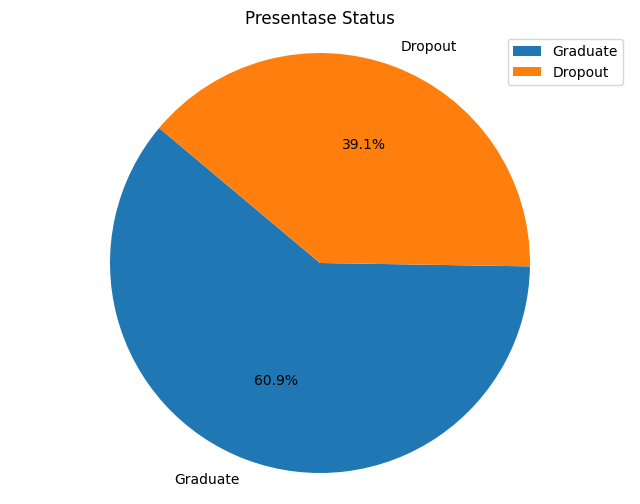

In [11]:
# Menghitung jumlah setiap nilai dalam kolom 'Status'
status_counts = student['Status'].value_counts()

labels = status_counts.index
sizes = status_counts.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Menyamakan skala sumbu x dan y agar pie chart berbentuk lingkaran
plt.title('Presentase Status')

plt.legend(labels=['Graduate', 'Dropout'], loc="best")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in student.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    student[column] = le.fit_transform(student[column].astype(str))
    label_encoders[column] = le

In [13]:
student.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [14]:
correlation_matrix = student.corr()
graduate_correlation = correlation_matrix["Status"].sort_values(ascending=False)

print(graduate_correlation)

Status                                          1.000000
Curricular_units_2nd_sem_approved               0.653995
Curricular_units_2nd_sem_grade                  0.605350
Curricular_units_1st_sem_approved               0.554881
Curricular_units_1st_sem_grade                  0.519927
Tuition_fees_up_to_date                         0.442138
Scholarship_holder                              0.313018
Curricular_units_2nd_sem_enrolled               0.182897
Curricular_units_1st_sem_enrolled               0.161074
Admission_grade                                 0.128058
Displaced                                       0.126113
Curricular_units_2nd_sem_evaluations            0.119239
Previous_qualification_grade                    0.109464
Application_order                               0.094355
Daytime_evening_attendance                      0.084496
Curricular_units_1st_sem_evaluations            0.059786
Curricular_units_2nd_sem_credited               0.052402
GDP                            

In [15]:
chosen_corr = graduate_correlation[(graduate_correlation > 0.2) | (graduate_correlation < -0.2)]
chosen_corr

Status                               1.000000
Curricular_units_2nd_sem_approved    0.653995
Curricular_units_2nd_sem_grade       0.605350
Curricular_units_1st_sem_approved    0.554881
Curricular_units_1st_sem_grade       0.519927
Tuition_fees_up_to_date              0.442138
Scholarship_holder                   0.313018
Application_mode                    -0.244507
Gender                              -0.251955
Debtor                              -0.267207
Age_at_enrollment                   -0.267229
Name: Status, dtype: float64

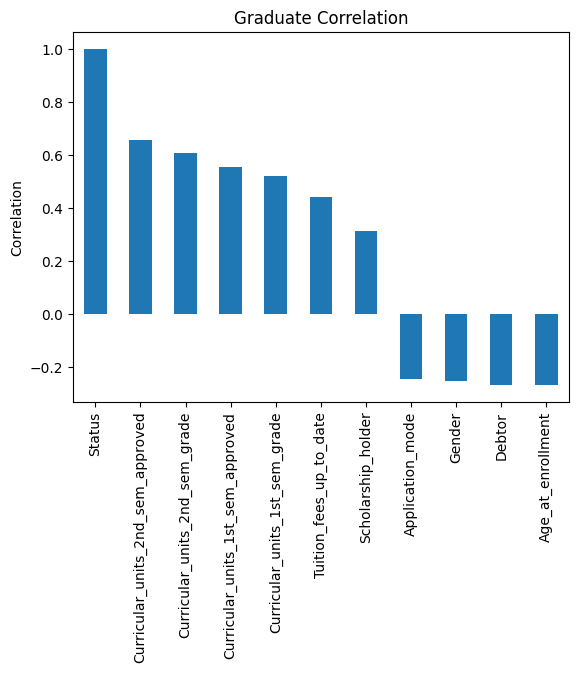

In [16]:
chosen_corr.plot(kind='bar')
plt.title('Graduate Correlation')
plt.ylabel('Correlation')
plt.show()

## Modeling

##Logistic Regression

In [17]:
features = ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Application_mode', 'Gender', 'Debtor', 'Age_at_enrollment']

X = student[features]
y = student['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy Logistic Regression:", accuracy_lr)

Accuracy Logistic Regression: 0.8898071625344353


##Random Forests

In [18]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forests:", accuracy_rf)

Accuracy Random Forests: 0.8856749311294766


##Support Vector Machines (SVM)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_scaled, y_train)

y_pred_svm = model_svm.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM:", accuracy_svm)

Accuracy SVM: 0.8925619834710744


## Evaluation

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluasi Logistic Regression
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Evaluation for Logistic Regression:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print()

# Evaluasi Random Forests
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Evaluation for Random Forests:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print()

# Evaluasi SVM
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Evaluation for SVM:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)


Evaluation for Logistic Regression:
Precision: 0.8819875776397516
Recall: 0.9487750556792873
F1-score: 0.9141630901287554

Evaluation for Random Forests:
Precision: 0.8828451882845189
Recall: 0.9398663697104677
F1-score: 0.9104638619201726

Evaluation for SVM:
Precision: 0.8762677484787018
Recall: 0.9621380846325167
F1-score: 0.9171974522292994


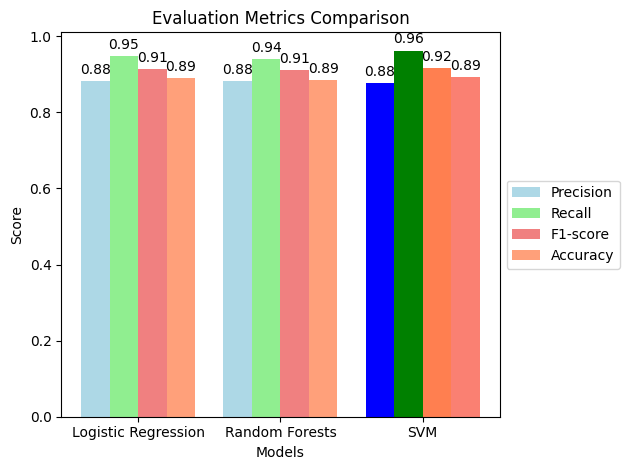

In [21]:
models = ['Logistic Regression', 'Random Forests', 'SVM']
precision_scores = [precision_lr, precision_rf, precision_svm]
recall_scores = [recall_lr, recall_rf, recall_svm]
f1_scores = [f1_lr, f1_rf, f1_svm]
accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_svm]

x = np.arange(len(models))

bar_width = 0.2
bar1 = plt.bar(x - bar_width * 1.5, precision_scores, width=bar_width, label='Precision', color=['lightblue', 'lightblue', 'blue'])
bar2 = plt.bar(x - bar_width * 0.5, recall_scores, width=bar_width, label='Recall', color=['lightgreen', 'lightgreen', 'green'])
bar3 = plt.bar(x + bar_width * 0.5, f1_scores, width=bar_width, label='F1-score', color=['lightcoral', 'lightcoral', 'coral'])
bar4 = plt.bar(x + bar_width * 1.5, accuracy_scores, width=bar_width, label='Accuracy', color=['lightsalmon', 'lightsalmon', 'salmon'])

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.title('Evaluation Metrics Comparison')
plt.xlabel('Models')
plt.ylabel('Score')

plt.xticks(x, models)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

SVM dipilih sebagai model yang paling baik dalam kasus ini.

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) #Menggunakan nilai reflektif, di mana menjelaskan setidaknya 95% dari total varians dalam data.
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Rasio Variance:", pca.explained_variance_ratio_)

Rasio Variance: [0.38251305 0.16282991 0.11987452 0.09045753 0.0809518  0.05430691
 0.04622723 0.04009186]


In [23]:
pca_selected = PCA(n_components=0.95)
X_train_selected = pca_selected.fit_transform(X_train_scaled)
X_test_selected = pca_selected.transform(X_test_scaled)

print("Bobot PCA:")
print(pca_selected.components_)

Bobot PCA:
[[-4.60596988e-01 -4.54918967e-01 -4.40276460e-01 -4.36384554e-01
  -2.53492091e-01 -1.74565316e-01  1.36202237e-01  1.87051633e-01
   1.46407168e-01  1.64068877e-01]
 [ 1.90685878e-01  1.49680615e-01  2.54589276e-01  1.60817870e-01
  -2.07904199e-01 -2.57711285e-01  5.81594217e-01  1.94707062e-01
   2.24603412e-01  5.60631692e-01]
 [ 3.15697052e-02  7.12662122e-02  3.82340549e-02  1.03167078e-01
  -5.53257346e-01  1.56546473e-01 -1.84570495e-01 -2.56041310e-01
   7.11072699e-01 -2.14408251e-01]
 [-4.23320385e-02 -1.12739694e-01 -5.55513671e-02 -1.34329279e-01
   8.93397804e-02  6.48450762e-01  3.36587154e-01 -5.67321828e-01
  -6.05546579e-02  3.11585669e-01]
 [-1.21161545e-03  3.96820294e-02 -1.16180018e-02  4.06835469e-02
   2.00139196e-02  6.63054325e-01  6.26154331e-02  7.30530421e-01
   1.18443745e-01 -7.04828702e-02]
 [ 6.14805317e-02  2.36863608e-02  7.90646277e-02  1.65213632e-02
  -7.24074381e-01  1.27491860e-01 -2.40174396e-01  3.87968636e-02
  -5.92667068e-01  1.9

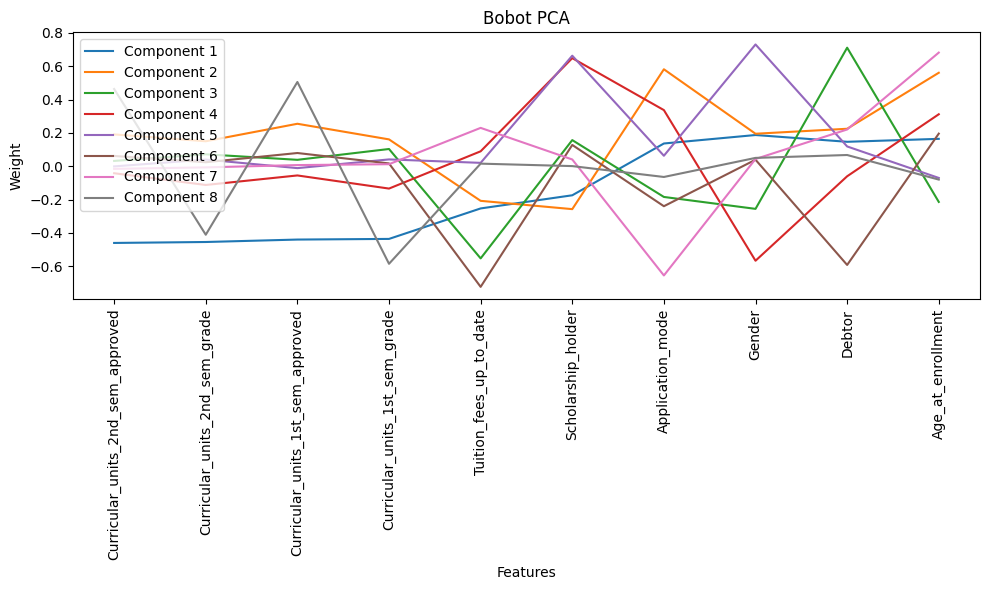

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Bobot PCA dari hasil sebelumnya
weights = np.array([
    [-4.60596988e-01, -4.54918967e-01, -4.40276460e-01, -4.36384554e-01,
     -2.53492091e-01, -1.74565316e-01,  1.36202237e-01,  1.87051633e-01,
      1.46407168e-01,  1.64068877e-01],
    [ 1.90685878e-01,  1.49680615e-01,  2.54589276e-01,  1.60817870e-01,
     -2.07904199e-01, -2.57711285e-01,  5.81594217e-01,  1.94707062e-01,
      2.24603412e-01,  5.60631692e-01],
    [ 3.15697052e-02,  7.12662122e-02,  3.82340549e-02,  1.03167078e-01,
     -5.53257346e-01,  1.56546473e-01, -1.84570495e-01, -2.56041310e-01,
      7.11072699e-01, -2.14408251e-01],
    [-4.23320385e-02, -1.12739694e-01, -5.55513671e-02, -1.34329279e-01,
      8.93397804e-02,  6.48450762e-01,  3.36587154e-01, -5.67321828e-01,
     -6.05546579e-02,  3.11585669e-01],
    [-1.21161545e-03,  3.96820294e-02, -1.16180018e-02,  4.06835469e-02,
      2.00139196e-02,  6.63054325e-01,  6.26154331e-02,  7.30530421e-01,
      1.18443745e-01, -7.04828702e-02],
    [ 6.14805317e-02,  2.36863608e-02,  7.90646277e-02,  1.65213632e-02,
     -7.24074381e-01,  1.27491860e-01, -2.40174396e-01,  3.87968636e-02,
     -5.92667068e-01,  1.95330118e-01],
    [-1.59802296e-02, -7.11457187e-03,  6.67573828e-03,  1.19173988e-02,
      2.29925374e-01,  4.02746356e-02, -6.55726663e-01,  4.32091570e-02,
      2.20257562e-01,  6.81661074e-01],
    [ 4.63263160e-01, -4.11306507e-01,  5.05312601e-01, -5.85677852e-01,
      1.52866219e-02,  5.61485591e-04, -6.46646140e-02,  4.97402691e-02,
      6.71188060e-02, -8.03759602e-02]
])

# Menentukan label fitur
fitur_labels = ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                'Tuition_fees_up_to_date', 'Scholarship_holder', 'Application_mode',
                'Gender', 'Debtor', 'Age_at_enrollment']

# Mendefinisikan sumbu x
x = range(len(weights[0]))

# Plot bobot PCA
plt.figure(figsize=(10, 6))
for i in range(len(weights)):
    plt.plot(x, weights[i], label=f'Component {i+1}')

# Menambahkan label pada sumbu x
plt.xticks(x, fitur_labels, rotation=90)
plt.xlabel('Features')
plt.ylabel('Weight')
plt.title('Bobot PCA')
plt.legend()
plt.tight_layout()
plt.show()

Explained Variance Ratio: [0.73530906 0.14771359 0.08990755]
Cumulative Explained Variance Ratio: [0.73530906 0.88302264 0.97293019]


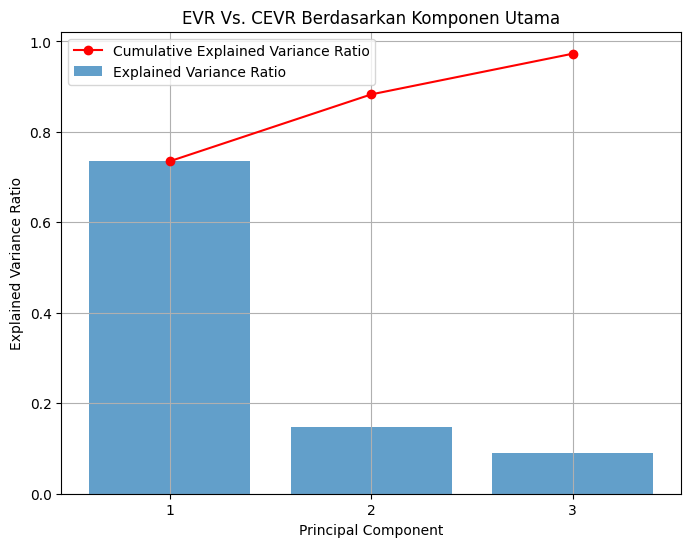

In [25]:
from sklearn.decomposition import PCA

# Membuat objek PCA
pca = PCA(n_components=0.95)

# Melakukan PCA pada data
pca.fit(X)

# Mengakses explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Menghitung cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Explained Variance Ratio')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance_ratio, color='red', marker='o', label='Cumulative Explained Variance Ratio', linestyle='-')
plt.title('EVR Vs. CEVR Berdasarkan Komponen Utama')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid(True)
plt.show()

Dalam analisis PCA, terdapat sepuluh faktor yang digunakan: **'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Application_mode', 'Gender', 'Debtor',** dan **'Age_at_enrollment'**. Komponen utama pertama memiliki rasio varians sekitar 73.5%, menunjukkan bahwa komponen ini secara signifikan menjelaskan pola atau struktur yang ada dalam data. Komponen utama kedua memberikan tambahan informasi yang relatif kecil, dengan rasio varians sekitar 14.8%.

Dengan demikian, dapat disimpulkan bahwa faktor-faktor yang digunakan memiliki pengaruh yang signifikan dalam menjelaskan pola atau struktur dalam data. Komponen utama pertama, yang memiliki rasio varians sekitar 73.5%, memiliki kontribusi yang lebih besar dalam menjelaskan variasi dalam data, diikuti oleh komponen utama kedua dengan rasio varians sekitar 14.8%.

Hal ini juga diperkuat dengan nilai cumulative explained variance ratio, di mana dua komponen utama mampu menjelaskan sekitar 88.3% dari total variasi dalam data. Ini menunjukkan bahwa **penggunaan sepuluh faktor tersebut memberikan gambaran yang cukup baik tentang struktur data secara keseluruhan.**

In [26]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pickle

encoder_dict = {}
for feature in features:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(X[feature])
    X[feature] = encoder.transform(X[feature])
    encoder_dict[feature] = encoder

# Train PCA
pca = PCA(n_components=2)
pca.fit(X)

# Train SVM model
model = SVC()
model.fit(X, y)

pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(encoder_dict, open('encoder.pkl', 'wb'))
pickle.dump(pca.components_, open('pca_weights.pkl', 'wb'))

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder_dict, f)

with open('pca_weights.pkl', 'wb') as f:
    pickle.dump(pca.components_, f)

<ipython-input-26-56395e7e2e29>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = encoder.transform(X[feature])
<ipython-input-26-56395e7e2e29>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = encoder.transform(X[feature])
<ipython-input-26-56395e7e2e29>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

#Business Dashboard

Dashboard menggunakan Tableau Public:
[Graduate Analysis Dashboard](https://public.tableau.com/views/DashboardJayaJayaInstitut/Dashboard1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link)

#Conclusion

Hasil analisis PCA menunjukkan bahwa faktor-faktor yang digunakan **('Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Application_mode', 'Gender', 'Debtor', dan 'Age_at_enrollment')**,  memiliki pengaruh yang signifikan dalam menjelaskan struktur data. Ini menyiratkan bahwa faktor-faktor tersebut mungkin menjadi penentu penting dalam menentukan apakah seorang siswa akan lulus atau drop out.

Dengan memahami ini, Jaya Jaya Institut dapat menggunakan informasi dari faktor-faktor ini untuk mengambil tindakan yang sesuai guna meningkatkan tingkat kelulusan dan mengurangi tingkat drop out. Ini dapat meliputi pemberian dukungan tambahan, bantuan keuangan, atau program-program mentoring kepada siswa.

Jadi, kesimpulannya adalah hasil analisis PCA ini memberikan wawasan yang berharga bagi Jaya Jaya Institut untuk mengidentifikasi faktor-faktor penting yang memengaruhi kesuksesan akademik siswa dan mengambil langkah-langkah yang diperlukan untuk meningkatkan tingkat kelulusan mereka.

##Rekomendasi Action Items

Berdasarkan analisis PCA, Jaya Jaya Institut dapat mengambil langkah-langkah berikut:

**1. Pemantauan Faktor Penting**: Pantau secara aktif faktor-faktor kunci yang mempengaruhi kesuksesan siswa, seperti jumlah unit kredit, status pembayaran biaya kuliah, dan kepemilikan beasiswa.

**2. Program Dukungan Siswa**: Dirancang program dukungan tambahan seperti tutor pribadi atau konseling akademik untuk siswa yang memerlukan.

**3. Bantuan Keuangan**: Pertimbangkan memberikan bantuan keuangan tambahan kepada siswa yang mengalami kesulitan finansial.

**4. Pengembangan Kebijakan**: Kembangkan kebijakan baru untuk meningkatkan tingkat kelulusan, termasuk revisi kebijakan penerimaan siswa baru dan peningkatan layanan akademik.